In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
data = pd.read_csv('text-data.csv')
data

,document,label
0,Arif youTube lectures are amaizing,positive
1,This is an amaizing place,positive
2,I do not like this restaurant,negative
3,Arif youTube lectures are great,positive
4,"I cannot deal with this, you deal with this",negative
5,This is my best work,positive
6,What an awesome view,positive
7,I am tired of this stuff,negative
8,He is my sworn enemy,negative
9,My boss is horrible,negative


In [4]:
data.shape

(18, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   document  18 non-null     object
 1   label     18 non-null     object
dtypes: object(2)
memory usage: 416.0+ bytes


In [6]:
data['target'] = data.label.map({'positive':1, 'negative': 0})
data

,document,label,target
0,Arif youTube lectures are amaizing,positive,1
1,This is an amaizing place,positive,1
2,I do not like this restaurant,negative,0
3,Arif youTube lectures are great,positive,1
4,"I cannot deal with this, you deal with this",negative,0
5,This is my best work,positive,1
6,What an awesome view,positive,1
7,I am tired of this stuff,negative,0
8,He is my sworn enemy,negative,0
9,My boss is horrible,negative,0


In [8]:
x = data.document
x

0              Arif youTube lectures are amaizing
1                       This is an amaizing place
2                   I do not like this restaurant
3                 Arif youTube lectures are great
4     I cannot deal with this, you deal with this
5                            This is my best work
6                            What an awesome view
7                        I am tired of this stuff
8                            He is my sworn enemy
9                             My boss is horrible
10                       This is an awesome place
11          I do not like the taste of this juice
12                            I love to do hiking
13              I am sick and tired of this place
14                           What a great holiday
15                 That is a bad locality to stay
16                 We will have good fun tomorrow
17                 I went to my enemy house today
Name: document, dtype: object

In [9]:
y = data.target
y

0     1
1     1
2     0
3     1
4     0
5     1
6     1
7     0
8     0
9     0
10    1
11    0
12    1
13    0
14    1
15    0
16    1
17    0
Name: target, dtype: int64

## Using Bag of words

In [11]:
cv = CountVectorizer()
type(cv)

sklearn.feature_extraction.text.CountVectorizer

In [13]:
bow = cv.fit_transform(x)
bow

<18x55 sparse matrix of type '<class 'numpy.int64'>'
	with 93 stored elements in Compressed Sparse Row format>

In [14]:
bow.todense()

matrix([[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1,

In [15]:
bow.toarray()

array([[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

In [17]:
dtm = pd.DataFrame(data = bow.todense(), columns = cv.get_feature_names_out())
dtm

,am,amaizing,an,and,are,arif,awesome,bad,best,boss,...,tomorrow,view,we,went,what,will,with,work,you,youtube
0,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,1,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
x_train, x_test, y_train, y_test = train_test_split(bow.toarray(), y, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((14, 55), (4, 55), (14,), (4,))

In [19]:
model = MultinomialNB()
model

MultinomialNB()

In [20]:
model.fit(x_train, y_train)

MultinomialNB()

In [21]:
y_pred = model.predict(x_test)

In [22]:
y_test

12    1
4     0
0     1
14    1
Name: target, dtype: int64

In [23]:
y_pred

array([0, 1, 1, 1])

Confusion Matrix:
 [[0 1]
 [1 2]]


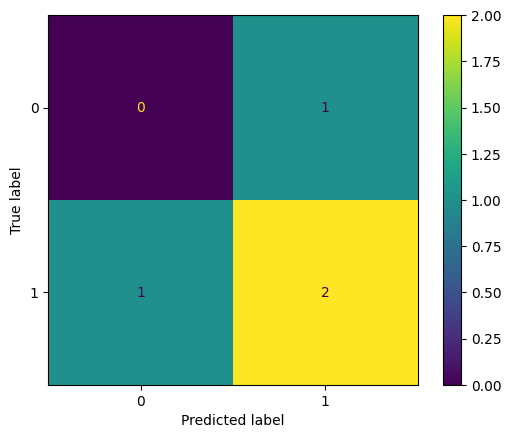

In [24]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [26]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy score: ", accuracy)
print("Precision score: ", precision)
print("Recall score: ", recall)
print("F1 score: ", f1)

Accuracy score:  0.5
Precision score:  0.6666666666666666
Recall score:  0.6666666666666666
F1 score:  0.6666666666666666


Prediction

In [27]:
new_doc = ["youtube lectures are great source of learning"]
new_vector = cv.transform(new_doc)
new_vector.toarray()

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [28]:
y_hat = model.predict(new_vector)
y_hat

array([1])

In [29]:
new_doc = ["i am sick and do not want to stay in this house"]
new_vector = cv.transform(new_doc)
y_hat = model.predict(new_vector)
y_hat

array([0])

## Using TFIDF

In [30]:
x

0              Arif youTube lectures are amaizing
1                       This is an amaizing place
2                   I do not like this restaurant
3                 Arif youTube lectures are great
4     I cannot deal with this, you deal with this
5                            This is my best work
6                            What an awesome view
7                        I am tired of this stuff
8                            He is my sworn enemy
9                             My boss is horrible
10                       This is an awesome place
11          I do not like the taste of this juice
12                            I love to do hiking
13              I am sick and tired of this place
14                           What a great holiday
15                 That is a bad locality to stay
16                 We will have good fun tomorrow
17                 I went to my enemy house today
Name: document, dtype: object

In [32]:
# Create an instance of TfidfVectorizer
tfidf_vec = TfidfVectorizer()
tfidf = tfidf_vec.fit_transform(x)

In [33]:
tfidf.toarray()

array([[0.        , 0.4472136 , 0.        , 0.        , 0.4472136 ,
        0.4472136 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.4472136 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.4472136 ],
       [0.        , 0.53557917, 0.48143796, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0. 

In [34]:
dtm = pd.DataFrame(data=tfidf.todense(), columns = tfidf_vec.get_feature_names_out())
dtm

,am,amaizing,an,and,are,arif,awesome,bad,best,boss,...,tomorrow,view,we,went,what,will,with,work,you,youtube
0,0.000000,0.447214,0.000000,0.00000,0.447214,0.447214,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.447214
1,0.000000,0.535579,0.481438,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.00000,0.447214,0.447214,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.447214
4,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.598814,0.00000,0.299407,0.000000
5,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.56056,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.56056,0.000000,0.000000
6,0.000000,0.000000,0.443222,0.00000,0.000000,0.000000,0.493066,0.000000,0.00000,0.000000,...,0.000000,0.563317,0.000000,0.000000,0.493066,0.000000,0.000000,0.00000,0.000000,0.000000
7,0.471917,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.587867,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [35]:
tfidf.toarray().shape

(18, 55)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(tfidf.toarray(), y, test_size=0.2)

In [37]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [38]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0])

In [39]:
y_test

12    1
10    1
2     0
7     0
Name: target, dtype: int64

Confusion Matrix:
 [[2 0]
 [1 1]]


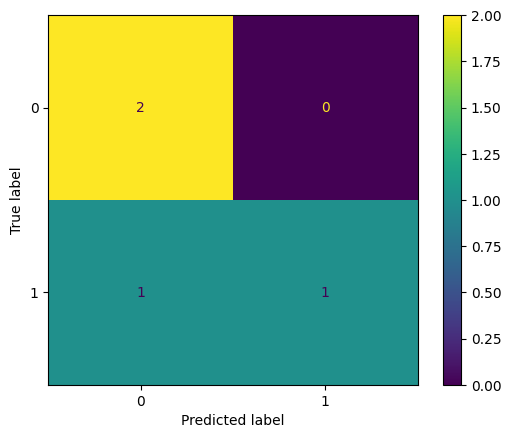

In [40]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [41]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy score: ", accuracy)
print("Precision score: ", precision)
print("Recall score: ", recall)
print("F1 score: ", f1)

Accuracy score:  0.75
Precision score:  1.0
Recall score:  0.5
F1 score:  0.6666666666666666


In [42]:
new_doc = ["youtube lectures are great source of learning"]
new_vector = cv.transform(new_doc)
new_vector.toarray()
y_hat = model.predict(new_vector)
y_hat

array([1])

In [43]:
new_doc = ["i am sick and do not want to stay in this house"]
new_vector = cv.transform(new_doc)
y_hat = model.predict(new_vector)
y_hat

array([0])